In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
%load_ext autoreload
%autoreload 2

!pwd
!python --version
import metnum


/home/mnpanic/repos/metnum-tp3/notebooks
Python 3.6.9


In [3]:
df = pd.read_csv('../data/train.csv')
df = df[df['ciudad']=='Mérida'].dropna()

x = df['metroscubiertos'].values
y = df['precio'].values

x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [ ]:
x.shape

In [ ]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

#linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression()

linear_regressor.fit(x,y)

In [ ]:
df['prediction'] = linear_regressor.predict(x)

In [ ]:
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=df, x='metroscubiertos', y='prediction', color='red')


In [4]:
df = pd.read_csv('../data/train.csv')

scores: {'r2': 0.48281747705285194, 'rmse': 747006.2949461192, 'rmsle': 0.6868523034605222}


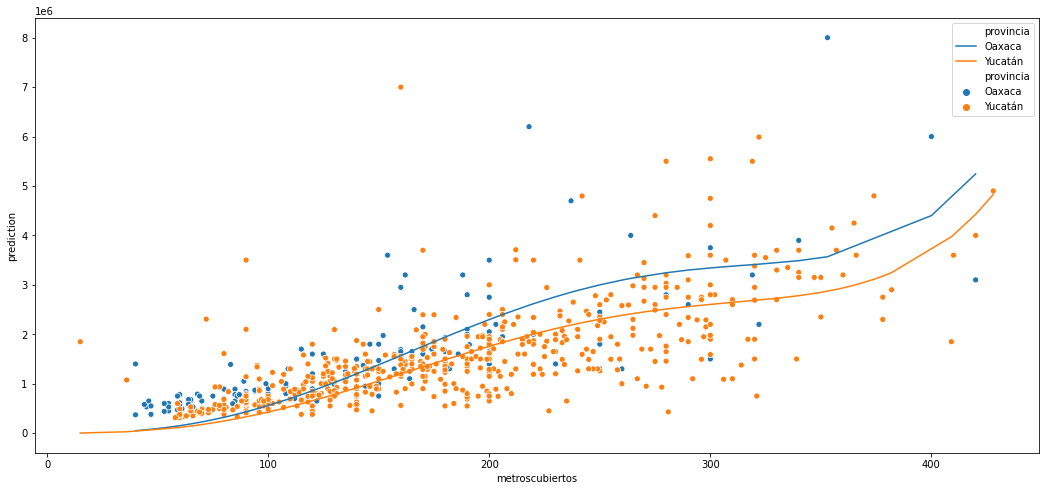

In [6]:
import wrappers

def segment(df):
    return [
        df[df['provincia']=='Oaxaca'].dropna(),
        df[df['provincia']=='Yucatán'].dropna(),
    ]

clf = wrappers.PolynomialRegressor(
    feature='metroscubiertos',
    explain='precio',
    degree=5, # lineal
    func_segment = segment,
)

clf.fit(df)
pred = clf.predict(df)

import matplotlib.pyplot as plt
plt.subplots(1, 1, figsize=(18, 8))

sns.scatterplot(data=pred, x='metroscubiertos', y='precio', hue='provincia')
sns.lineplot(data=pred, x='metroscubiertos', y='prediction', hue="provincia")

scores = clf.scores(df, ["r2", "rmse", "rmsle"])
print("scores:", scores)


In [ ]:
scores = 